##### [ 이미지 합성 ]
- 픽셀 (Pixel)단위 덧셈 연산으로 이미지 픽셀 합치기
- 두 이미지 합성하기 위해 각각의 이미지에 가중치 주고 합성 진행
    * cv2.addW() : 합성 이미지에 가중치 설정

[1] 이미지 픽셀 기본 연산 <HR>

In [1]:
## 모듈 로딩
import numpy as np
import cv2
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
## [1-2] 데이터 준비
img_file = '../Data/Image/ddd.png'
bg_file  = '../Data/Image/ddd2.png'

img1 = cv2.imread(img_file)
img2 = cv2.imread(bg_file)

## img1 기준으로 img2 리사이즈
h, w = img1.shape[:2]
img2 = cv2.resize(img2, (w, h))   # (width, height) 순서 주의

## 이미지 기본정보 확인
print(f'img1 정보 : {img1.shape}')
print(f'img2 정보 : {img2.shape}')

img1 정보 : (152, 154, 3)
img2 정보 : (152, 154, 3)


[3] 이미지 덧셈 <hr>

In [3]:
## 이미ㅣ지 덧셈
img3 = img1 + img2
img4 = cv2.add(img1, img2)

imgs = {'img1' : img1, 'img2' : img2, "img1 + img2" : img3, 'cv2.add(img1, img2)' : img4}

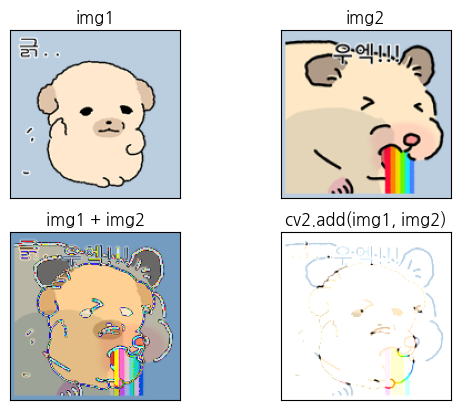

In [4]:
## 시각화
for i, (k,v) in enumerate(imgs.items()) :
    plt.subplot(2,2,i + 1)
    plt.imshow(v[:, :, ::-1])
    plt.title(k)
    plt.xticks([]); plt.yticks([])

In [5]:
## 이미지 트랙바로 변환 (Alpha Blending)
win_name = "alpha blending"
trackbar_name = "fade"   # 0~100

def onChange(x):
    alpha = x / 100.0
    # dst = img1*(1-alpha) + img2*alpha
    dst = cv2.addWeighted(img1, 1 - alpha, img2, alpha, 0)
    cv2.imshow(win_name, dst)

# 윈도우 생성 및 초기 표시
cv2.namedWindow(win_name)
cv2.imshow(win_name, img1)

# 트랙바 생성 (초기값 0, 최대 100)
cv2.createTrackbar(trackbar_name, win_name, 0, 100, onChange)

# 트랙바 초기값 반영(처음에도 합성 화면이 뜨게)
onChange(0)

cv2.waitKey(0)
cv2.destroyAllWindows()
